<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/Bar_Chart_Race_Cereais_and_PyWaffle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization 
## Bar Chart Race and The Waffle Plot

In this project, I am gonna show how to create two different ways to show your data, one is an interactive graph and the other one is a graph in which you can highlight the proportion of your data in a different way.


When I think about graphics I want to show what is in the dataset in a simple and friendly way to the audience.

And f that in mind, here I am showing how we can build and create the bar chart race to pass the idea of the growth of something through time or the waffle plot when we are thinking about the distribution of the numbers with icons.


<p align=center><img src="https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/Sloglan%20de%20ETL.jpg?raw=true" width="50%"></p>

### ETL and EDA 
So first and foremost for this project, I had to extract the data from the [IBGE webpage - agriculture](https://www.ibge.gov.br/estatisticas/economicas/agricultura-e-pecuaria/9201-levantamento-sistematico-da-producao-agricola.html?=&t=downloads) and assemble the data into an Excel spreadsheet, treatment the data into a dataset which the `bar_chart_race` library would accept.

For more details about how you have to build a dataset for the bar chart race library you can find in [Bar Chart Race](https://www.dexplo.org/bar_chart_race/).

In [ ]:
# Call the library
import pandas as pd

In [ ]:
# Store the data
df = pd.read_excel('//content/drive/MyDrive/Agrícola de Cereais e Leguminosas.xlsx',index_col="Data")

In [ ]:
# Show the infos about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2018-01-31 to NaT
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Algodão Herbáceo  36 non-null     float64
 1   Amendoim          36 non-null     float64
 2   ARROZ             36 non-null     float64
 3   AVEIA             36 non-null     float64
 4   CENTEIO           36 non-null     float64
 5   CEVADA            36 non-null     float64
 6   FEIJÃO            36 non-null     float64
 7   GIRASSOL          36 non-null     float64
 8   MAMONA            36 non-null     float64
 9   MILHO             36 non-null     float64
 10  SOJA              36 non-null     float64
 11  SORGO             36 non-null     float64
 12  TRIGO             36 non-null     float64
 13  TRITICALE         36 non-null     float64
dtypes: float64(14)
memory usage: 8.2 KB


As we can see the dataset has 14 columns, 70 entries, 36 non-nulls and the type of each entry (rows) is numeric, in this case, `float64`.

In [ ]:
# The 5 entries of the dataset
df.head()

,Algodão Herbáceo,Amendoim,ARROZ,AVEIA,CENTEIO,CEVADA,FEIJÃO,GIRASSOL,MAMONA,MILHO,SOJA,SORGO,TRIGO,TRITICALE
Data,,,,,,,,,,,,,,
2018-01-31,2642646.0,519265.0,11743923.0,702992.0,5386.0,372164.0,3395558.0,103252.0,83041.0,85772559.0,112433054.0,2186167.0,6127363.0,58166.0
2018-02-28,2626009.0,518024.0,11741474.0,702992.0,5386.0,372164.0,3347222.0,99461.0,15375.0,86135364.0,113154525.0,2346276.0,6120403.0,58166.0
2018-03-31,2700754.0,516819.0,11765226.0,702992.0,5386.0,372164.0,3374079.0,126779.0,15347.0,87168843.0,114525973.0,2366737.0,5565661.0,58166.0
2018-04-30,2723075.0,590939.0,11603259.0,752077.0,8920.0,423886.0,3475701.0,135918.0,23750.0,86559444.0,115617772.0,2396216.0,5620444.0,45953.0
2018-05-31,2846920.0,551609.0,11583177.0,752077.0,8920.0,427394.0,3377575.0,144882.0,24690.0,84559187.0,115752047.0,2396247.0,5630425.0,45953.0


In [ ]:
# The last 5
df.tail()

,Algodão Herbáceo,Amendoim,ARROZ,AVEIA,CENTEIO,CEVADA,FEIJÃO,GIRASSOL,MAMONA,MILHO,SOJA,SORGO,TRIGO,TRITICALE
Data,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The percentage of NaN values in the dataset
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).round(4)

TRITICALE           0.4857
TRIGO               0.4857
SORGO               0.4857
SOJA                0.4857
MILHO               0.4857
MAMONA              0.4857
GIRASSOL            0.4857
FEIJÃO              0.4857
CEVADA              0.4857
CENTEIO             0.4857
AVEIA               0.4857
ARROZ               0.4857
Amendoim            0.4857
Algodão Herbáceo    0.4857
dtype: float64

As we could see the Nan-values are almost 50% of the dataset, and to treat that I call a new variable `df_use` to store the dataframe with the `.loc[]` function that I just select the rows with values. 

In [ ]:
# filter the data set by the index
df_use = df.loc["1/31/2018":"30/09/2021",:]

In [ ]:
# check the dataset again
df_use.head()

,Algodão Herbáceo,Amendoim,ARROZ,AVEIA,CENTEIO,CEVADA,FEIJÃO,GIRASSOL,MAMONA,MILHO,SOJA,SORGO,TRIGO,TRITICALE
Data,,,,,,,,,,,,,,
2018-01-31,2642646.0,519265.0,11743923.0,702992.0,5386.0,372164.0,3395558.0,103252.0,83041.0,85772559.0,112433054.0,2186167.0,6127363.0,58166.0
2018-02-28,2626009.0,518024.0,11741474.0,702992.0,5386.0,372164.0,3347222.0,99461.0,15375.0,86135364.0,113154525.0,2346276.0,6120403.0,58166.0
2018-03-31,2700754.0,516819.0,11765226.0,702992.0,5386.0,372164.0,3374079.0,126779.0,15347.0,87168843.0,114525973.0,2366737.0,5565661.0,58166.0
2018-04-30,2723075.0,590939.0,11603259.0,752077.0,8920.0,423886.0,3475701.0,135918.0,23750.0,86559444.0,115617772.0,2396216.0,5620444.0,45953.0
2018-05-31,2846920.0,551609.0,11583177.0,752077.0,8920.0,427394.0,3377575.0,144882.0,24690.0,84559187.0,115752047.0,2396247.0,5630425.0,45953.0


In [ ]:
# Chceck the percentage about the Nan values again
(df_use.isnull().sum()/df_use.shape[0]).sort_values(ascending=False).round(4)

TRITICALE           0.0
TRIGO               0.0
SORGO               0.0
SOJA                0.0
MILHO               0.0
MAMONA              0.0
GIRASSOL            0.0
FEIJÃO              0.0
CEVADA              0.0
CENTEIO             0.0
AVEIA               0.0
ARROZ               0.0
Amendoim            0.0
Algodão Herbáceo    0.0
dtype: float64

In [ ]:
# The new shape of the dataset becomes
df_use.shape

(36, 14)

### Bar Chart Race steps

With the dataset fixed now is the time to install the `bar_chart_race` packet and call the functions.

In [ ]:
# Install the bar chart race library
!pip install bar_chart_race -q

     |████████████████████████████████| 156 kB 7.7 MB/s 


In [ ]:
# import the packet
import bar_chart_race as bcr

In [ ]:
# Building the customization
bcr.bar_chart_race(
    df=df_use, # selecionando os dados
    filename=None, # nomeando o arquivo
    orientation='h', # orientação do gráfico
    sort='desc', # organização 
    n_bars=6, # número de barras
    fixed_order=False, # ordem fixa
    fixed_max=True, # máximo fixo
    steps_per_period=10, # stepos por período
    interpolate_period=False, # interpolar o período
    label_bars=True, # colocar labels nas barras
    bar_size=.95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
        period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Produção total (t): {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'}, # resumo do período
    perpendicular_bar_func='median', # função da barra perpendicular
    period_length=500,# tamanho do período
    figsize=(7, 3), # tamanho da período
    dpi=144, 
    cmap='dark12', # esquema de cores
    title='Produção', # título
    title_size='', # tamamnho do título
    bar_label_size=7, # tamanho do label das barras
    tick_label_size=7, # tamanho do tick do label
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale='linear', # escala dos dados
    writer=None, # escrever no plot
    fig=None, # definir a figura
    bar_kwargs={'alpha': .7}, # kwargs
    filter_column_colors=False)  # filtrar cores das colunas

/usr/local/lib/python3.7/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


In [ ]:
# Salving to HTML
bcr_html = bcr.bar_chart_race(df=df_use,filename = 'bar_chart_race.html')

### PyWaffle

Another way to show how data were spread in the dataset is through the waffle plot. This type of plot is good when we want to compare how the distribution of two or three values are in the dataset.

The documetation about the PyWaffle library you can find in [Here](https://github.com/gyli/PyWaffle).


In [ ]:
# install pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 526 kB 15.2 MB/s 


In [ ]:
# Calling the libraries
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np

In [ ]:
# building a dict
data = df_use.apply(np.sum,axis='index').to_dict()

In [ ]:
# showing the dict
data

{'ARROZ': 397151058.0,
 'AVEIA': 32937144.0,
 'Algodão Herbáceo': 129706710.0,
 'Amendoim': 21575880.0,
 'CENTEIO': 330707.0,
 'CEVADA': 14506998.0,
 'FEIJÃO': 109881897.0,
 'GIRASSOL': 3678513.0,
 'MAMONA': 1041235.0,
 'MILHO': 3360931147.0,
 'SOJA': 4339614131.0,
 'SORGO': 90874007.0,
 'TRIGO': 225584434.0,
 'TRITICALE': 1470503.0}

### PyWaffle 

In the script below you will find the steps that I used to build my own PyWaffle plot, and for more information about how to customize your own plot you can find it in the [PyWaffle Documetation](https://pywaffle.readthedocs.io/en/latest/examples/plot_with_characters_or_icons.html) and to change the icons in the [Fontawesome](https://fontawesome.com/v6.0/docs/web/setup/quick-start).

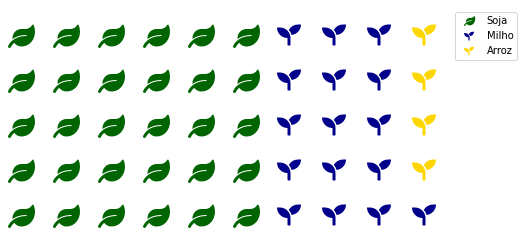

In [ ]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    figsize = (16,4),
    values={'Soja': 30, 'Milho': 16, 'Arroz': 4}, 
    colors=("#006400", "#00008B","#FFD700"),
    icons = ['leaf','seedling','seedling'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
    icon_size=24, 
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();